# Exercise 3 - Pixelwise operations

## Explorative data analysis

First we will be working with an X-ray image of the human vertebra, vertebra.png. This type of images can for example be used for diagnosis of osteoporosis. A symptom is the so-called vertebral compression fracture. However, the diagnosis is very difficult to do based on x-rays alone.

### Exercise 1

Start by reading the image and inspect the histogram. Is it a bimodal histogram? Do you think it will be possible to segment it so only the bones are visible?

In [1]:
from skimage import color, io, measure, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [2]:
in_dir="data/"
im_name="vertebra.png"
im_org=io.imread(in_dir+im_name)

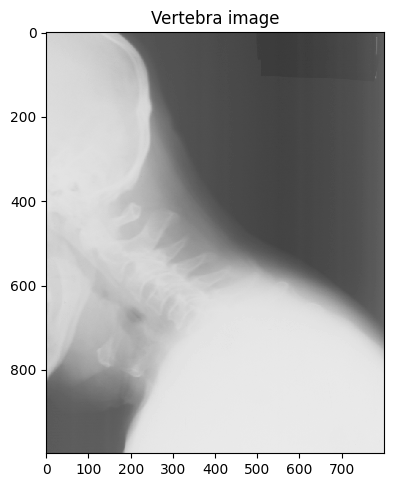

In [3]:
io.imshow(im_org)
plt.title('Vertebra image')
io.show()

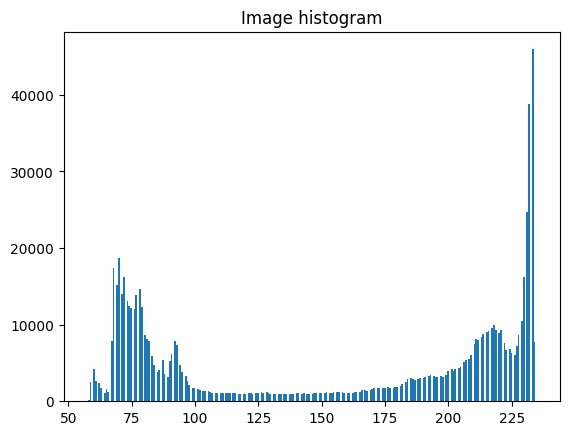

In [4]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

### Exercise 2

Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [5]:
print(f"The minimum value of the image is {np.amin(im_org)}, and the maximum is {np.amax(im_org)}.")

The minimum value of the image is 57, and the maximum is 235.


# Pixel type conversions

Before going further, we need to understand how to convert between between pixel types and what should be considered. A comphrehensive guide can be found here (it is not mandatory reading, we just use some highlights). One important point is that we should avoid using the astype function on images. We did that in ex2b, but we will not so that anymore

## Conversion from unsigned byte to float image

In unsigned byte images, the possible pixel value range is [0, 255]. When converting an unsigned byte image to a float image, the possible pixel value range will be [0, 1]. When you use Python skimage function img_as_float on an unsigned byte image, it will automatically divide all pixel values with 255

### Exercise 3

Add an important statement to your script:

In [6]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

Read the image vertebra.png and compute and show the minumum and maximum values.

Use img_as_float to compute a new float version of your input image. Compute the minimum and maximum values of this float image. Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?

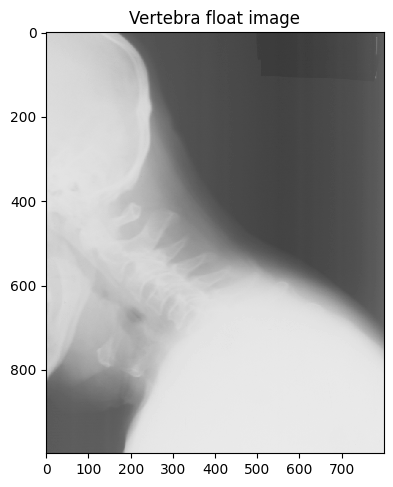

In [7]:
im_float=img_as_float(im_org)
io.imshow(im_float)
plt.title('Vertebra float image')
io.show()

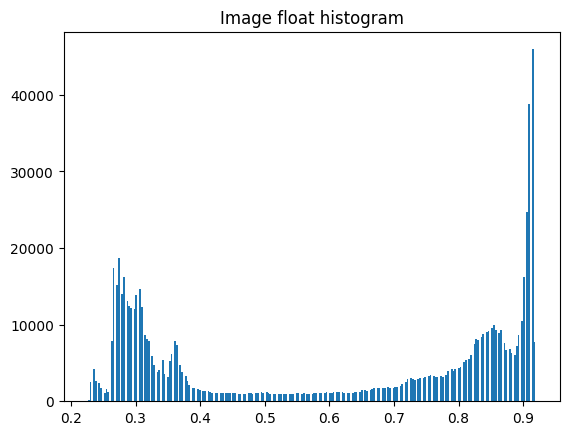

In [8]:
plt.hist(im_float.ravel(), bins=256)
plt.title('Image float histogram')
io.show()

In [9]:
print(f"The minimum value of the float image is {np.amin(im_float)}, and the maximum is {np.amax(im_float)}.")

The minimum value of the float image is 0.22352941176470587, and the maximum is 0.9215686274509803.


## Conversion from float image to unsigned byte image

As stated above, an (unsigned) float image can have pixel values in [0, 1]. When using the Python skimage function img_as_ubyte on an (unsigned) float image, it will multiply all values with 255 before converting into a byte. Remember that all decimal number will be converted into integers by this, and some information might be lost.

### Exercise 4

Use img_as_ubyte on the float image you computed in the previous exercise. Compute the Compute the minimum and maximum values of this image. Are they as expected?

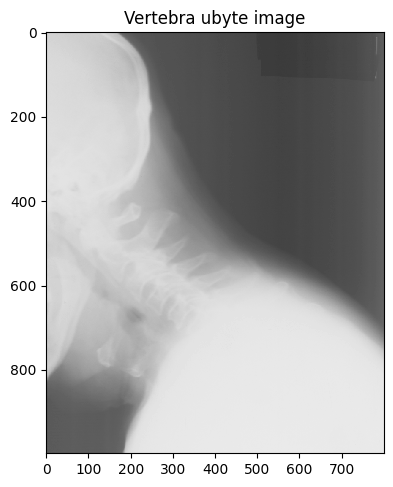

In [10]:
im_ubyte=img_as_ubyte(im_float)
io.imshow(im_ubyte)
plt.title('Vertebra ubyte image')
io.show()

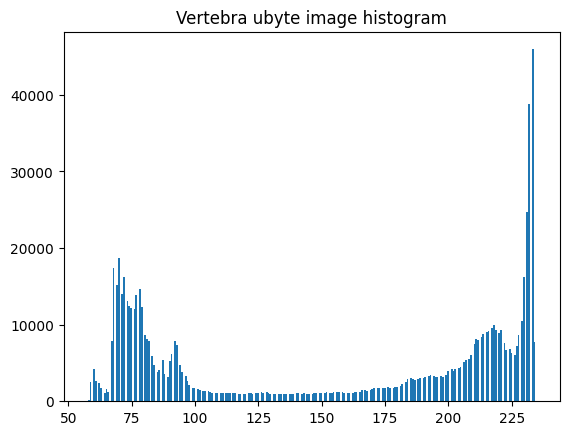

In [11]:
plt.hist(im_ubyte.ravel(), bins=256)
plt.title('Vertebra ubyte image histogram')
io.show()

In [12]:
print(f"The minimum value of the ubyte image is {np.amin(im_ubyte)}, and the maximum is {np.amax(im_ubyte)}.")

The minimum value of the ubyte image is 57, and the maximum is 235.


# Histogram stretching

You should implement a function, that automatically stretches the histogram of an image. In other words, the function should create a new image, where the pixel values are changed so the histogram of the output image is optimal. Here optimal means, that the minimum value is 0 and the maximum value is 255. It should be based on the linear histogram stretching equation:

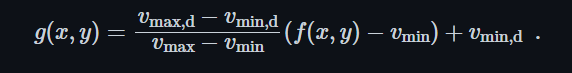

Here f(x,y) is the input pixel value and g(x,y) is the output pixel value, vmax,d and vmin,d are the desired minimum and maximum values (0 and 255) and vmax and vmin are the current minumum and maximum values.

### Exercise 5

Implement a Python function called histogram_stretch. It can, for example, follow this example:

In [13]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out=((max_desired-min_desired)/(max_val-min_val))*(img_float-min_val)+min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

### Exercise 6

Test your histogram_stretch on the vertebra.png image. Show the image before and after the histogram stretching. What changes do you notice in the image? Are the important structures more visible?

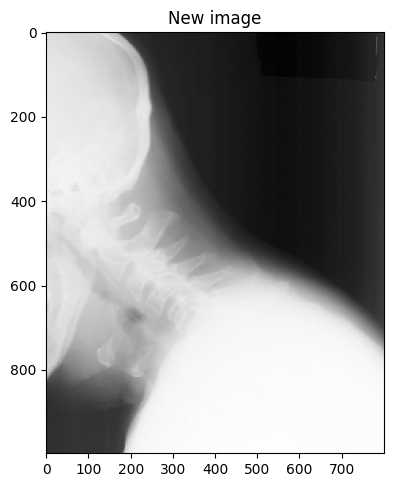

In [14]:
new_image=histogram_stretch(im_org)
io.imshow(new_image)
plt.title('New image')
io.show()

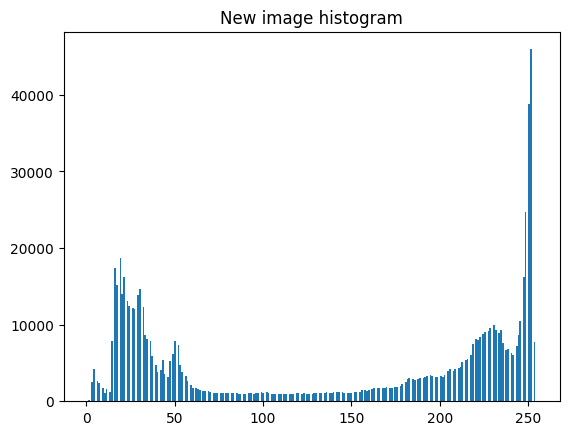

In [15]:
plt.hist(new_image.ravel(), bins=256)
plt.title('New image histogram')
io.show()

# Non-linear pixel value mapping

The goal is to implement and test a function tha performs gamma-mapping of pixel values:
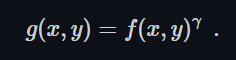
You can use the Numpy function power to compute the actual mapping function.

### Exercise 7
Implement a function, gamma_map(img, gamma), that:

    1. Converts the input image to float
    2. Do the gamma mapping on the pixel values
    3. Returns the resulting image as an unsigned byte image


In [16]:
def gamma_map(img, gamma):
    """
    Function that performs a gamma-mapping of pixel values
    """
    # Converts the input image to float
    img=img_as_float(img)
    # Do the gamma-mapping on the pixel values
    img_gamma=np.power(img, gamma)
    #Returns the resulting image as an unsigned byte image
    return img_as_ubyte(img_gamma)

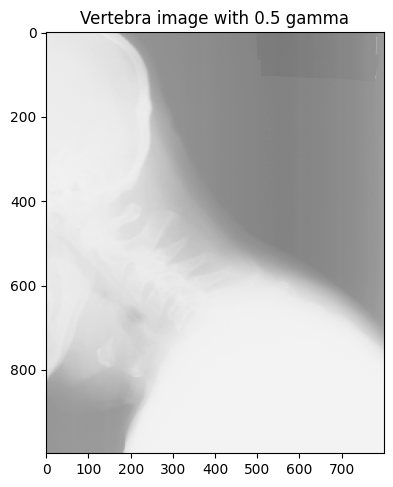

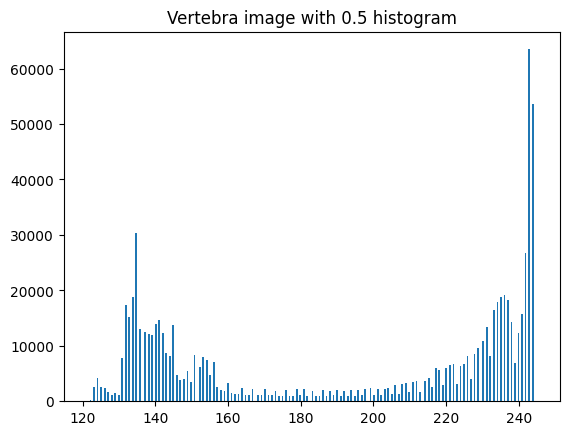

In [17]:
gamma=0.5
gamma_image=gamma_map(im_org, gamma)
io.imshow(gamma_image)
plt.title('Vertebra image with 0.5 gamma')
io.show()
plt.hist(gamma_image.ravel(), bins=256)
plt.title('Vertebra image with 0.5 histogram')
io.show()

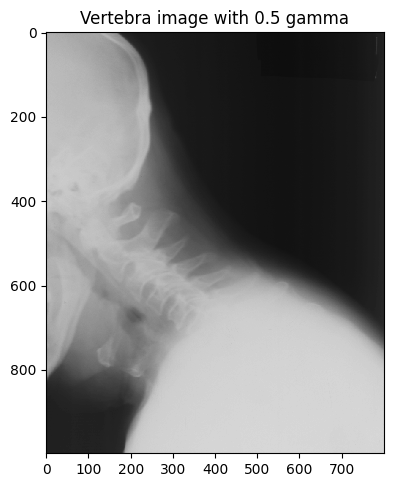

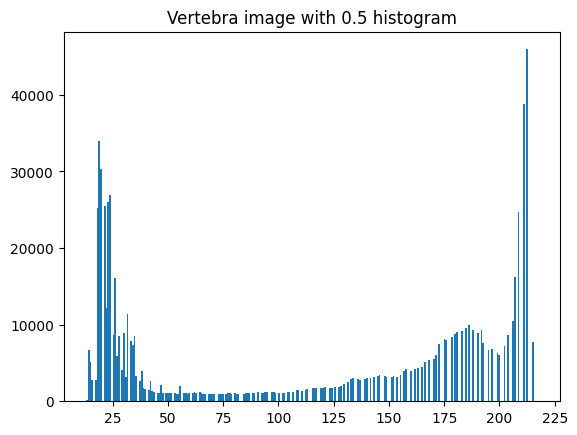

In [18]:
gamma=2
gamma_image=gamma_map(im_org, gamma)
io.imshow(gamma_image)
plt.title('Vertebra image with 2 gamma')
io.show()
plt.hist(gamma_image.ravel(), bins=256)
plt.title('Vertebra image with 0.5 histogram')
io.show()

# Image segmentation by thresholding

Now we will try to implement some functions that can seperate an image into segments. In this exercise, we aim at seperating the background from the foreground by setting a threshold in a gray scale image or several thresholds in color images.

### Exercise 9 

Implement a function, threshold_image:

In [19]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    ret, thresh1 = cv2.threshold(img_in, thres, 255, cv2.THRESH_BINARY)
    return img_as_ubyte(thresh1)

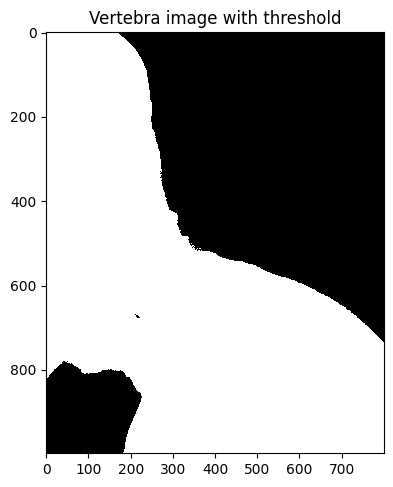

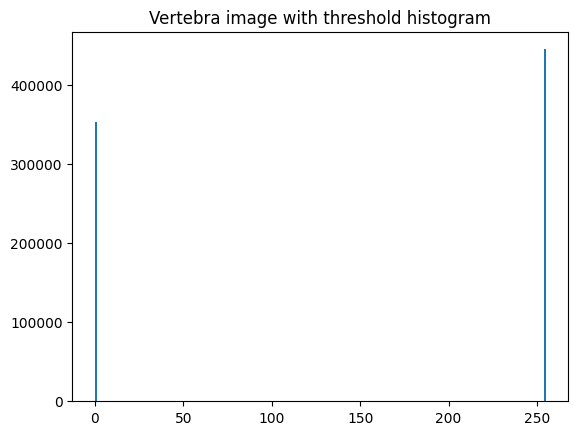

In [20]:
thres=150
thresh_im=threshold_image(im_org, thres)
io.imshow(thresh_im)
plt.title('Vertebra image with threshold')
io.show()
plt.hist(thresh_im.ravel(), bins=256)
plt.title('Vertebra image with threshold histogram')
io.show()

## Automatic Thresholds using Otsu's method
An optimal threshold can be estimated using Otsu's method. This method finds the threshold, that minimizes the combined variance of the foreground and background.

### Exercise 11
Read the documentation of Otsu's method and use it to compute and apply a threshold to the vertebra image.

Remember to import the method:

In [21]:
from skimage.filters import threshold_otsu

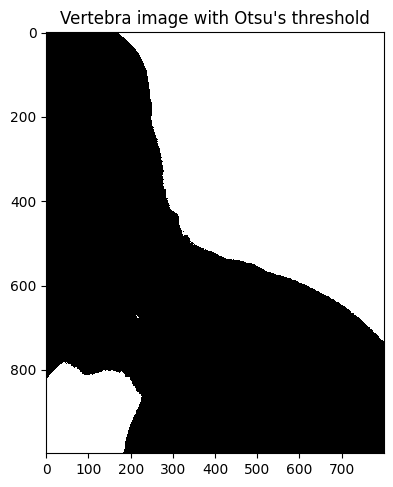

In [22]:
thresh = threshold_otsu(im_org)
thresh_otsu_im = im_org <=thresh

io.imshow(thresh_otsu_im)
plt.title("Vertebra image with Otsu's threshold")
io.show()

## Color thresholding in the RGB color space

In the following, we will make a simple system for road-sign detection. Start by reading the image DTUSigns2.jpg found in the exercise data. We want to make a system that do a segmentation of the image - meaning that a new binary image is created, where the foreground pixels correspond to the sign we want to detect.

In [23]:
im_name="DTUSigns2.jpg"
im_org=io.imread(in_dir+im_name)

We do that by tresholding the colour-channels individually. This code segments out the blue sign:

In [24]:
r_comp = im_org[:, :, 0]
g_comp = im_org[:, :, 1]
b_comp = im_org[:, :, 2]
segm_blue = (r_comp < 10) & (g_comp >85) & (g_comp < 105) & (b_comp >180) & (b_comp <200)

### Exercise 13

Create a function detect_dtu_signs that takes as input a color image and returns an image, where the blue sign is identified by foreground pixels.

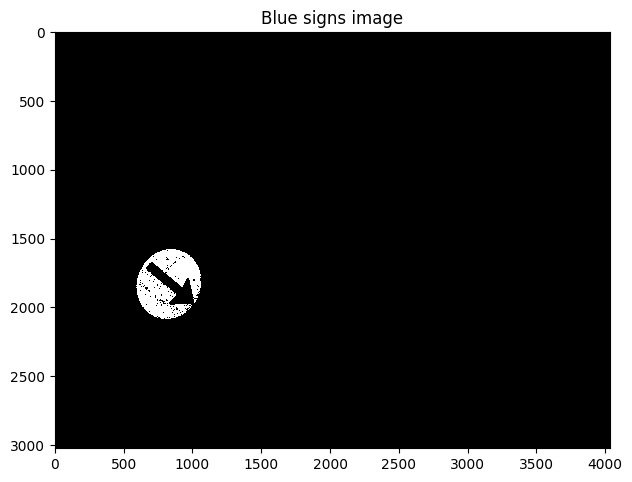

In [25]:
def detect_dtu_signs(im_org):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp >85) & (g_comp < 105) & (b_comp >180) & (b_comp <200)
    return segm_blue

blue_org = detect_dtu_signs(im_org)
io.imshow(blue_org)
plt.title("Blue signs image")
io.show()


### Exercise 14
Extend your detect_dtu_signs function so it can also detect red signs. You can add an argument to the function, that tells which color it should look for you. You should use one of the explorative image tools to find out what the typical RGB values are in the red signs.

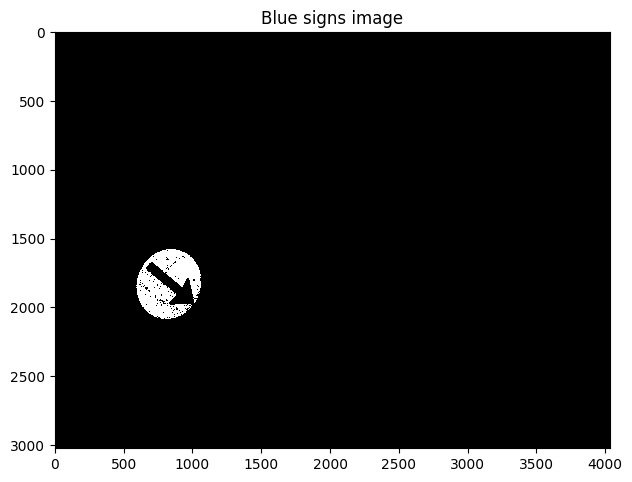

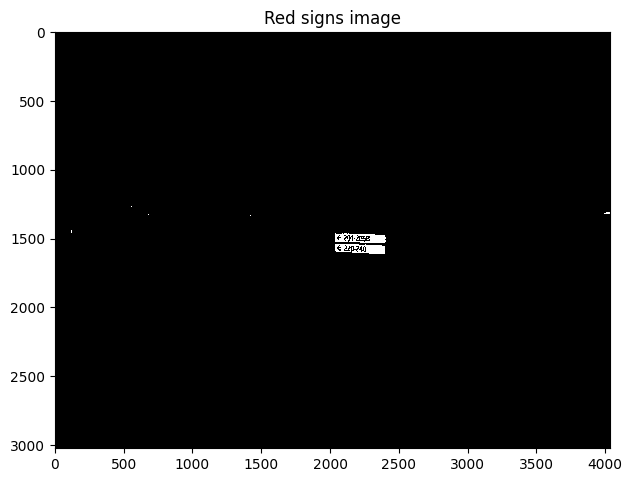

In [26]:
def detect_dtu_signs(im_org, color):
    
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]

    if color == "blue":
        segm_blue = (r_comp < 10) & (g_comp >85) & (g_comp < 105) & (b_comp >180) & (b_comp <200)
        return segm_blue
    if color == "red":
        segm_red = (r_comp < 180) & (r_comp > 130) & (g_comp < 70) & (b_comp < 70)
        return segm_red
    else:
        print("Color not defined")
        return False

blue_org = detect_dtu_signs(im_org, "blue")
io.imshow(blue_org)
plt.title("Blue signs image")
io.show()

red_org = detect_dtu_signs(im_org, "red")
io.imshow(red_org)
plt.title("Red signs image")
io.show()

## Color thresholding in the HSV color space
Sometimes it gives better segmentation results when the tresholding is done in HSI (also known as HSV - hue, saturation, value) space. Start by reading the DTUSigns2.jpg image, convertit to HSV and show the hue and value

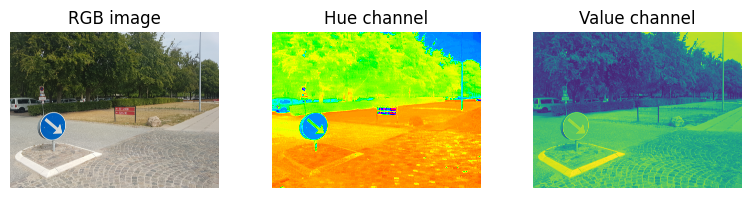

In [27]:
im_name="DTUSigns2.jpg"
im_org=io.imread(in_dir+im_name)

hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8,2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

### Exercise 15 
Now make a sign segmentation function using tresholding in HSV space and locate both the blue and the red sign

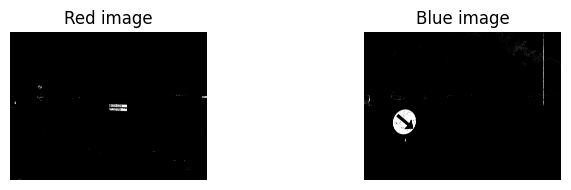

In [34]:
def detect_dtu_signs_hsv(im_org):
    hsv_img = color.rgb2hsv(im_org)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    segm_blue = (hue_img < 0.6) & (hue_img  > 0.4) & (value_img < 0.77) & (value_img > 0.70)
    segm_red = (hue_img < 1.0) & (hue_img  > 0.9)
    return segm_blue, segm_red

segm_blue, segm_red = detect_dtu_signs_hsv(hsv_img)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8,2))
ax0.imshow(segm_red, cmap = 'gray')
ax0.set_title("Red image")
ax0.axis('off')
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title("Blue image")
ax1.axis('off')
fig.tight_layout()
io.show()

# Real time pixelwise operations on videos
In the exercise material, there is a Python script using OpenCV that:

1. Connects to a camera
2. Acquire images, converts them to gray-scale
3. Do a simple processing on the gray-scale (inversion) or the colour image (inversion of the red channel)
4. Computes the frames per second (fps) and shows it on an image.
5. Shows input and resulting images in windows.
9. Checks if the key q has been pressed and stops the program if it is pressed.

It is possible to use a mobile phone as a remote camera by following the instructions in exercise 2b.

In [37]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2


def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    img_float = img_as_float(img)
    img_proc = 1 - img_float
    return img_as_ubyte(img_proc)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Input gray', new_image_gray, 600, 10)
        show_in_moved_window('Processed image', proc_img, 0, 300)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


### Exercise 16

Run the program from the exercise material and see if it shows the expected results?

### Exercise 17
Change the gray-scale processing in the exercise material sript to be for example thresholding, gamma mapping or something else. Do you get the visual result that you expected?

In [41]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2


def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    #img_float = img_as_float(img)
    #img_proc = 1 - img_float
    
    #gamma = 2
    #img_proc = gamma_map(img, gamma)
    
    thresh = threshold_otsu(img)
    img_proc = img <=thresh
    return img_as_ubyte(img_proc)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Input gray', new_image_gray, 600, 10)
        show_in_moved_window('Processed image', proc_img, 0, 300)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


### Excercise 18: Real time detection of DTU signs
Change the rgb-scale processing in the exercise material script so it does a color threshold in either RGB or HSV space. The goal is to make a program that can see DTU street signs. THe output should be a binary image, where the pixels of the sign is foreground. Later in the course, we will learn how to remove the noise pixels.

In [5]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2

def detect_dtu_signs_hsv(im_org):
    hsv_img = color.rgb2hsv(im_org)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    dtu_signs = ((hue_img < 0.6) & (hue_img  > 0.4) & (value_img < 0.77) & (value_img > 0.70)) | ((hue_img < 1.0) & (hue_img  > 0.9))
    return img_as_ubyte(dtu_signs)

def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    #img_float = img_as_float(img)
    #img_proc = 1 - img_float
    
    #gamma = 2
    #img_proc = gamma_map(img, gamma)
    
    thresh = threshold_otsu(img)
    img_proc = img <=thresh
    return img_as_ubyte(img_proc)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break
        
        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        """
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)
        """
        # Detect the DTU signs
        proc_img = detect_dtu_signs_hsv(new_image)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Input gray', new_image_gray, 600, 10)
        show_in_moved_window('Processed image', proc_img, 0, 300)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
